<a href="https://colab.research.google.com/github/mahesh-keswani/pytorch-example-notebook/blob/main/4_PyTorchMulticlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Torchvision is a library for Computer Vision that goes hand in hand with PyTorch. It has utilities for efficient Image and Video transformations,
# some commonly used pre-trained models, and some datasets ( torchvision does not come bundled with PyTorch , you will have to install it separately.)
# More on that: https://medium.com/swlh/understanding-torchvision-functionalities-for-pytorch-391273299dc9
import torch
import torch.nn as nn 
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ToTensor: Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
def getData(train = False):
    dataset = torchvision.datasets.MNIST(
        root = ".", # load the data in the current directory
        train = train,
        download = True,
        transform = transforms.ToTensor()
    )
    return dataset

In [3]:
# this will return the object with 2 attributes, .data and .targets, where .data contains trainImages, .targets contain trainLabels
trainDataset = getData(train = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
# 60000 samples with 28x28 dimensions
trainDataset.data.shape

torch.Size([60000, 28, 28])

In [5]:
# You will notice that the data is in the range [0, 255], but remember we even did the transform when loading the data.
# Note: When you call the .data, this will not call the transform inplicitly 
trainDataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [6]:
# See the data is not normalized
trainDataset.data.max()

tensor(255, dtype=torch.uint8)

In [7]:
# All the same things go with the testDatset as well
testDataset = getData()

In [8]:
print(f"Test input samples shape {testDataset.data.shape}")
print(f"Test output samples shape {testDataset.targets.shape}")

Test input samples shape torch.Size([10000, 28, 28])
Test output samples shape torch.Size([10000])


In [9]:
# Note the input samples are of shape(N, height, width), but our model expects the input as 2D matrix, 
# we will reshape the data from (60000, 28, 28) -> (60000, 784)
# Basically flat the features of each image

In [10]:
# Now lets get the model ready
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

# NOTE: Notice that we are not using softmax as the final activation, because the crossEntropyLoss equation in the pytorch
# is already simplied as per the softmax output
# For more details: https://shaktiwadekar.medium.com/why-softmax-not-used-when-cross-entropy-loss-is-used-as-loss-function-during-neural-network-d77abd708715


In [11]:
# Now we don;t want to load the entire dataset in the memory at once, instead we would like to load the data in batches
# so pytorch's DataLoader can be useful here
batchSize = 128
trainLoader = torch.utils.data.DataLoader(
    trainDataset,
    batch_size = batchSize,
    shuffle = True
)

testLoader = torch.utils.data.DataLoader(
    testDataset,
    batch_size = batchSize,
    shuffle = False
)

In [12]:
# NOTE: Whenevr you call the DataLoader, it implicity calls the "transform" function which you had define earlier while loading the data
# Lets look at the single sample
sampleLoader = torch.utils.data.DataLoader(
    trainDataset,
    batch_size = 1,
    shuffle = True
)
for inputs, targets in sampleLoader:
    print(inputs) # Here the data would be normalized
    print(inputs.shape)
    print(targets.shape)
    break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [13]:
# input shape = [1, 1, 28, 28] -> batchSize, numberOfChannels, height, width
# target shape = [1] -> batchSize

In [14]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [15]:
# NOW let;s load the model in the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [16]:
EPOCHS = 10
trainLosses = np.zeros(EPOCHS)
testLosses = np.zeros(EPOCHS)

for epcoh in range(EPOCHS):
    trainLoss = [] # this will have loss per batch
    for inputs, targets in trainLoader:
        inputs, targets = inputs.to(device), targets.to(device)
        
        # flat the inputs samples
        inputs = inputs.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        trainLoss.append( loss.item() )

        loss.backward()
        optimizer.step()
    
    # This has loss per epoch
    trainLosses[epcoh] = np.mean( trainLoss )
    
    testLoss = []
    for inputs, targets in testLoader:
        inputs, targets = inputs.to(device), targets.to(device)

        inputs = inputs.view(-1, 784)

        outputs = model(inputs)

        loss = criterion(outputs, targets)
        testLoss.append( loss.item() )
    
    testLosses[epcoh] = np.mean( testLoss )
    print(f"Epoch {epcoh + 1}, Train Loss = {trainLosses[epcoh]}, Test Loss = {testLosses[epcoh]}")

Epoch 1, Train Loss = 0.4078377261916712, Test Loss = 0.2218400037764937
Epoch 2, Train Loss = 0.19113273351494944, Test Loss = 0.15506017598311736
Epoch 3, Train Loss = 0.13937908881254543, Test Loss = 0.12653723714837828
Epoch 4, Train Loss = 0.10865837418988569, Test Loss = 0.10655050486019707
Epoch 5, Train Loss = 0.08846235518723028, Test Loss = 0.09570824688217969
Epoch 6, Train Loss = 0.07374516312183856, Test Loss = 0.08798231274372886
Epoch 7, Train Loss = 0.06256284842541668, Test Loss = 0.0813904036414114
Epoch 8, Train Loss = 0.053204398493030304, Test Loss = 0.0801664018956355
Epoch 9, Train Loss = 0.045030512970123594, Test Loss = 0.07204408857409984
Epoch 10, Train Loss = 0.038584676432186986, Test Loss = 0.06852117250673473


In [18]:
# To Make Predictions

# Now remember, we don't have softmax as the activation in the output layer, so the outputs are just plain logits
# Hence we cannot treat the outputs as the probabilities.
# But we can still use the max function to get the index of the maximum value from the 10 outputs
# Because in the softmax of 10 output values, the one with the largest logit will have the largest softmax value as well
# HENCE:  we can use the max function
# Now Note: torch.max() returns the two things (maxValues, indicesOfMaxValues)
# we are interested in the indicesOfMaxValues and not the logits (maxValues) because they will be predicted classes
# maxValues, indicesOfMaxValues = torch.max( outputs, axis = 1 )

totalCorrect = 0.
totalCount = 0.
for inputs, targets in trainLoader: 
    inputs, targets = inputs.to(device), targets.to(device)

    inputs = inputs.view(-1, 784)
    outputs = model(inputs)

    maxValues, indicesOfMaxValues = torch.max( outputs, axis = 1 )
    totalCorrect += (indicesOfMaxValues == targets).sum().item()
    totalCount += targets.shape[0]

print(f"Train Accuracy {totalCorrect / totalCount}")

totalCorrect = 0.
totalCount = 0.
for inputs, targets in testLoader: 
    inputs, targets = inputs.to(device), targets.to(device)

    inputs = inputs.view(-1, 784)
    outputs = model(inputs)

    maxValues, indicesOfMaxValues = torch.max( outputs, axis = 1 )
    totalCorrect += (indicesOfMaxValues == targets).sum().item()
    totalCount += targets.shape[0]

print(f"Test Accuracy {totalCorrect / totalCount}")



Train Accuracy 0.99295
Test Accuracy 0.9785


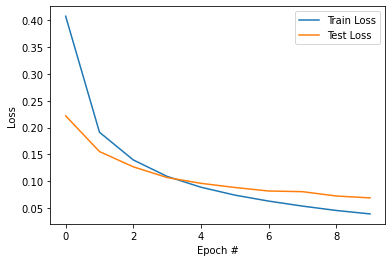

In [19]:
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.plot(trainLosses, label = "Train Loss")
plt.plot(testLosses, label = "Test Loss")
plt.legend();

In [20]:
# Now lets look at some sample where our model incorrectly classifies the image
predictions = np.array([]) # we will store the predictions here and will compare it with targets
for inputs, targets in testLoader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784)
    outputs = model(inputs)
    _, preds = torch.max( outputs, axis = 1 )
    
    # Bring the predictions back in the cpu 
    predictions = np.concatenate( (predictions, preds.cpu().numpy()) )

Confusion matrix, without normalization
[[ 968    0    2    0    1    1    3    1    2    2]
 [   0 1123    3    1    0    1    3    1    3    0]
 [   4    1 1013    0    3    1    2    4    4    0]
 [   0    0    7  985    0    4    1    4    4    5]
 [   0    0    4    1  961    0    4    3    2    7]
 [   2    0    0    5    1  876    3    1    3    1]
 [   4    3    1    1    3    3  943    0    0    0]
 [   1    5   11    4    0    0    0  998    1    8]
 [   4    1    4    4    3    4    2    5  940    7]
 [   2    4    0    3   12    5    0    3    2  978]]


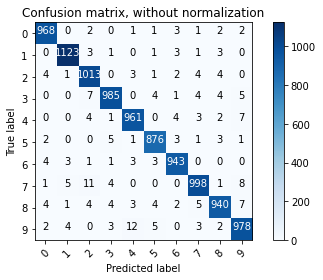

In [21]:
# Refernce for plotting confusion matrix for multiple classes
# https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


y_true = testDataset.targets.numpy()
y_pred = predictions

classes = list( range(10) )
cnf_matrix = confusion_matrix( y_true, y_pred, labels = classes )
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = classes,
                      title='Confusion matrix, without normalization')

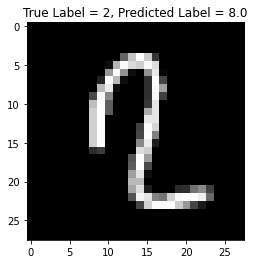

In [24]:
# We can see that the model incorrectly classifies when the input images is 9 and model predicts 4
misclassfied_samples = np.where( y_true != y_pred )[0]
index = np.random.choice(misclassfied_samples)

sampleInput = testDataset.data.numpy()[index]
plt.imshow(sampleInput, cmap = 'gray')
plt.title(f"True Label = {y_true[index]}, Predicted Label = {y_pred[index]}");